========= 30d-10ETH (2025-03-03~2025-05-01) =========
info: {'start_date': datetime.date(2025, 3, 3), 'deposit_end_date': datetime.date(2025, 4, 2), 'total_end_date': datetime.date(2025, 5, 1), 'init_eth': 10, 'init_usdc': np.float64(25173.382391622978), 'MIN_ETH': 0.01, 'MAX_ETH': 0.5, 'MIN_USDC': 50, 'MAX_USDC': 2000, 'MAX_USERS': 10, 'BASIS': 0.5, 'W_FACTOR': 1, 'SEED': 42}
deposits:145  withdraws:144
User PnL Total: -6125.577574534347, 
 User PnL Average: -42.53873315648852
========= 30d-100ETH (2025-03-03~2025-05-01) =========
info: {'start_date': datetime.date(2025, 3, 3), 'deposit_end_date': datetime.date(2025, 4, 2), 'total_end_date': datetime.date(2025, 5, 1), 'init_eth': 100, 'init_usdc': np.float64(251733.82391622977), 'MIN_ETH': 0.01, 'MAX_ETH': 0.5, 'MIN_USDC': 50, 'MAX_USDC': 2000, 'MAX_USERS': 10, 'BASIS': 0.5, 'W_FACTOR': 1, 'SEED': 42}
deposits:145  withdraws:144
User PnL Total: -5236.3526156772405, 
 User PnL Average: -36.36355983109195
========= 30d-1000ETH (2025-03-

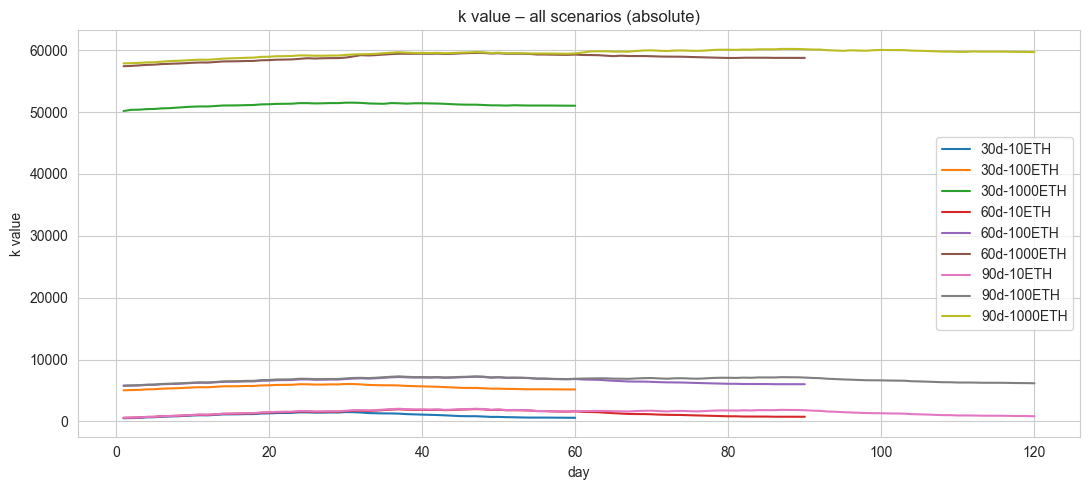

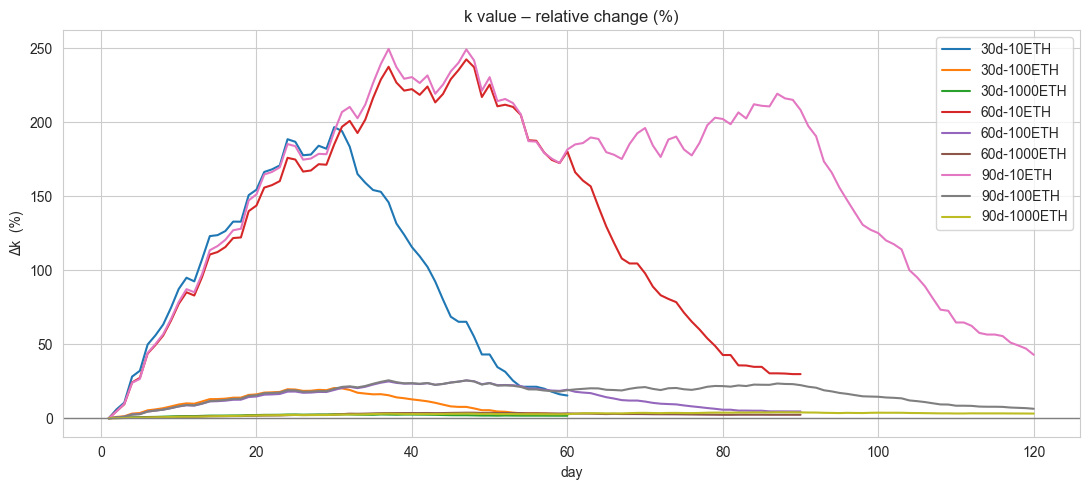

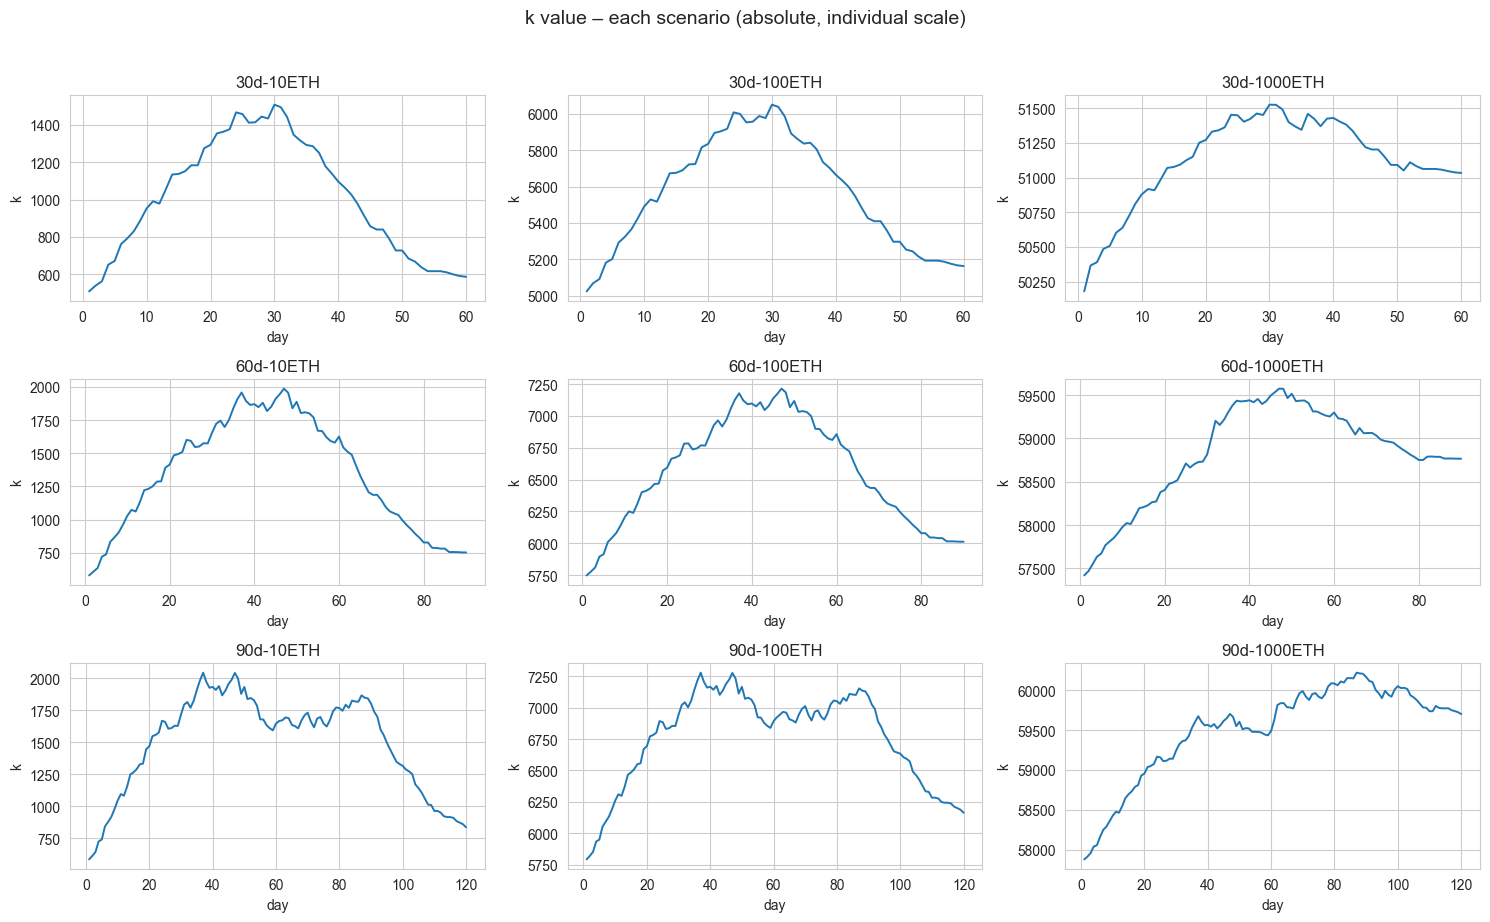

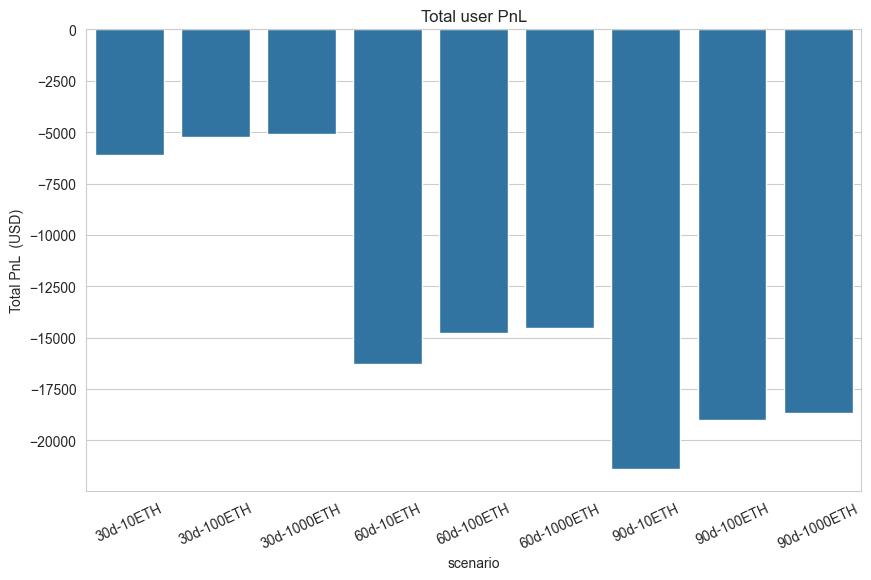

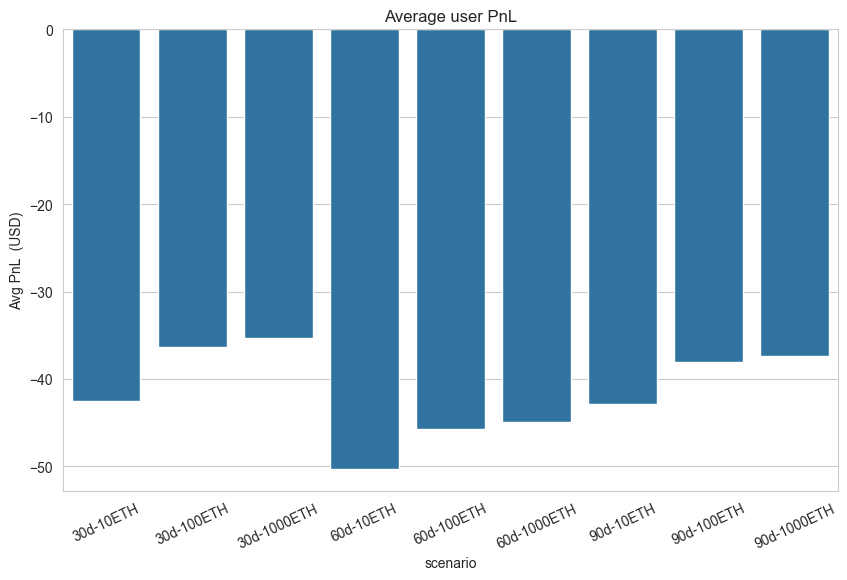

[compare] ✅  saved to results/_compare


In [ ]:
import sys, pathlib; sys.path.append("backtest_module")
from backtest import BacktestRunner
from analyzer import Analyzer
from compare import compare_runs  


horizons = [30, 60, 90]
init_eths = [10, 100, 1000]
BASIS = 0.5
W_FACTOR = 1

results = {}  # {(h, init_eth): (dep, wd, snap, info)}

for h in horizons:
    for ie in init_eths:

        runner = BacktestRunner(init_eth=ie, main_days=h, basis=BASIS)
        info = runner.get_info()
        tag = f"{h}d-{ie}ETH ({info['start_date']}~{info['total_end_date']})"

        dep_df, wd_df, snap_df = runner.run()
        results[(h, ie)] = (dep_df, wd_df, snap_df, info)

        print(f"========= {tag} =========")
        print(f"info: {info}")
        print(f"deposits:{len(dep_df)}  withdraws:{len(wd_df)}")
        print(f"User PnL Total: {wd_df["pnl_usd"].sum()}, \n User PnL Average: {wd_df["pnl_usd"].mean()}")
        # 個別分析 & 存檔
        Analyzer(dep_df, wd_df, snap_df, tag).all_plots()

# ----------- ★ 產出總比較 ---------------
compare_runs(results)